# <center> Распознание Женский\Мужской голос

Столбцы датасета:
- meanfreq — средняя частота голоса спикера (в кГц);
- sd — стандартное отклонение частоты (в кГц);
- median — медианная частота (в кГц);
- Q25 — первый квартиль частоты (25-я квантиль) (в кГц);
- Q75 — третий квартиль частоты (75-я квантиль) (в кГц);
- IQR — межквартильный размах (Q75-Q25) (в кГц);
- skew — асимметрия распределения частот;
- kurt — эксцесс распределения частот;
- sp.ent — спектральная энтропия;
- sfm — спектральная равномерность;
- ode — модальная частота (наиболее популярная частота голоса);
- centroid — частотный центроид;
- peakf — пиковая частота (частота с наибольшей энергией);
- meanfun — среднее значение основной частоты, измеренной по акустическому сигналу;
- minfun — минимальное значение основной частоты, измеренной по акустическому сигналу;
- maxfun — максимальное значение основной частоты, измеренной по акустическому сигналу;
- meandom — среднее значение доминирующей частоты, измеренной по акустическому сигналу;
- mindom — минимальное значение доминирующей частоты, измеренной по акустическому сигналу;
- maxdom — максимальное значение доминирующей частоты, измеренной по акустическому сигналу;
- dfrange — диапазон доминирующей частоты, измеренный по акустическому сигналу;
- modindx — индекс модуляции;
- label — целевой признак — метка класса: male (голос принадлежит мужчине) или female (голос принадлежит женщине).

## Изучение датасета

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

In [98]:
voice_data = pd.read_csv('data/voice.csv')
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [99]:
# Проверим из каких признаков состоит датасет
voice_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [100]:
# Проверим наличие пропусков
voice_data.isnull().sum().sum()

0

In [101]:
voice_data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [102]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
import statistics
from plotly.subplots import make_subplots
#выделяем имена числовых признаков в виде списка для удобства дальнейшей работы
types = voice_data.dtypes
types = types.drop(['kurt'])
num_features = list(types[(types != 'object')].index)

fig = px.box(
    data_frame=voice_data,
    x=num_features,
    title='Статистические показатели в числовых признаках'
)
fig.update_layout(xaxis_title= 'Значение')
fig.show()

In [103]:
df_1 = voice_data.groupby('label', as_index=False)['meanfreq'].value_counts()
fig = px.scatter(
    data_frame=df_1,
    y='meanfreq',
    color='label',
    title='Зависимость гендера от meanfreq'
)
fig.show()

In [104]:
from sklearn.preprocessing import LabelEncoder
# преобразуйте наш искомый признак где 1 это мужчина а 0 женшина
encoder = LabelEncoder()
data_new = voice_data.copy()
data_new['label'] = encoder.fit_transform(data_new['label'])
data_new['label'].value_counts()

label
1    1584
0    1584
Name: count, dtype: int64

In [105]:
data_new

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,0
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,0
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,0
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0


Наиболее высокая корреляция между признаками:


,level_0,level_1,0
231,centroid,meanfreq,1.000000
375,maxdom,dfrange,0.999838
153,kurt,skew,0.977020
233,centroid,median,0.925445
42,median,meanfreq,0.925445
234,centroid,Q25,0.911416
3,meanfreq,Q25,0.911416
106,IQR,sd,0.874660
108,IQR,Q25,0.874189
177,sp.ent,sfm,0.866411


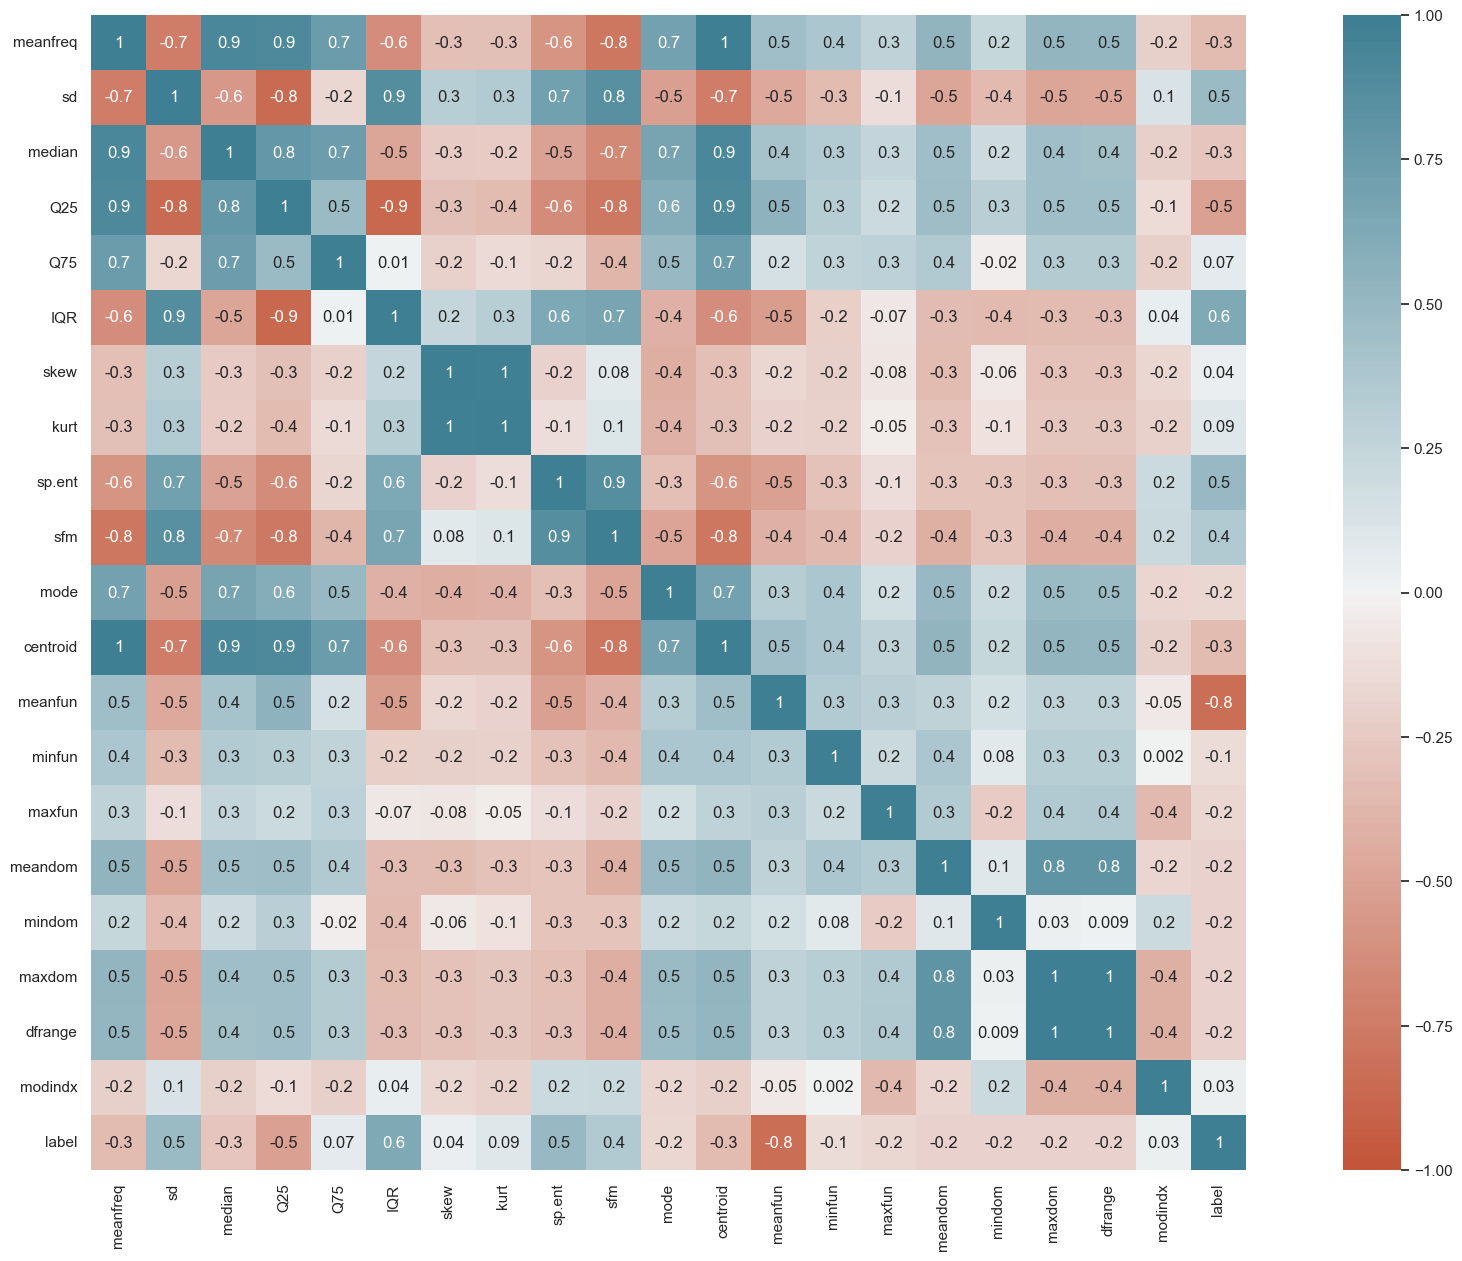

In [106]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности
corr = data_new.corr()
sns.set(rc={'figure.figsize':(25, 15)})
ax = sns.heatmap(
    corr, 
    vmin=-1, 
    vmax=1, 
    center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    fmt='.1g'
);
print('Наиболее высокая корреляция между признаками:')
corr_unstack = corr.abs().unstack().reset_index()
corr_unstack = corr_unstack.sort_values(by=[0], ascending=False)
mask = corr_unstack['level_0'] != corr_unstack['level_1']
corr_unstack = corr_unstack[mask]
corr_unstack['pr1'] = corr_unstack['level_0'] + corr_unstack['level_1']
corr_unstack['pr1'] = corr_unstack['pr1'].apply(lambda x: ''.join(sorted(list(x))))
corr_unstack = corr_unstack.drop_duplicates(subset=['pr1'])
corr_unstack = corr_unstack.drop(['pr1'], axis=1)
corr_unstack.iloc[:30, :]

In [107]:
X = voice_data.drop(['label'], axis=1)
y = voice_data['label']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (2534, 20)
Test shape: (634, 20)


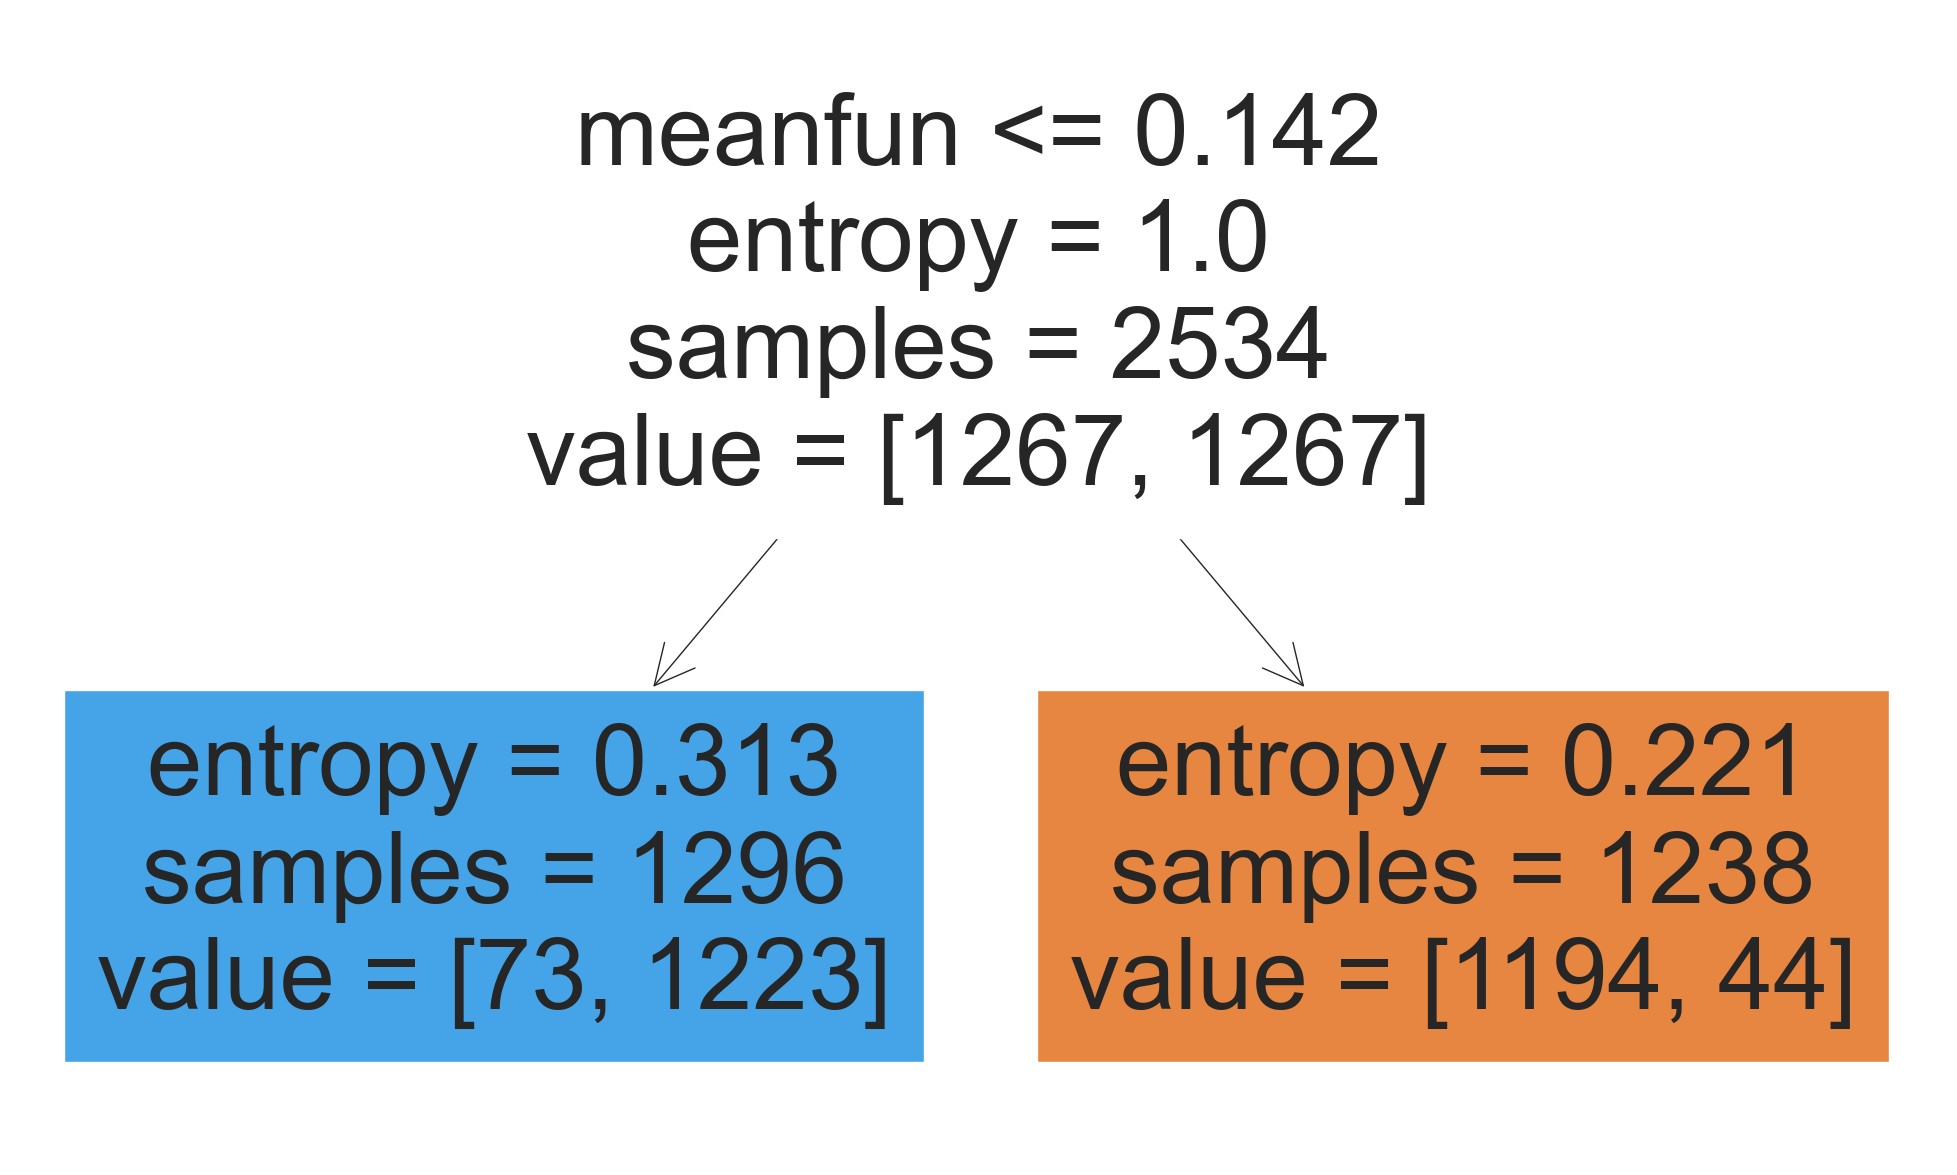

In [108]:
# 7.1
# Инициализируем модель дерева решений с максимальной глубиной 1 и обучаем ее
dt = tree.DecisionTreeClassifier(
    max_depth=1, #глубина
    criterion='entropy', #критерий информативности
    random_state=0 #генератор случайных чисел
)
dt.fit(X_train, y_train)

# Визуализируем дерево решений в виде графа
tree.plot_tree(
    decision_tree=dt, #дерево решений 
    feature_names=X.columns, #имена факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
);

In [109]:
# Делаем предсказания для тестовой и тренировочной выборки
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Проверим метрики 
print(metrics.accuracy_score(y_test, y_test_pred))

0.9558359621451105


0.9621451104100947


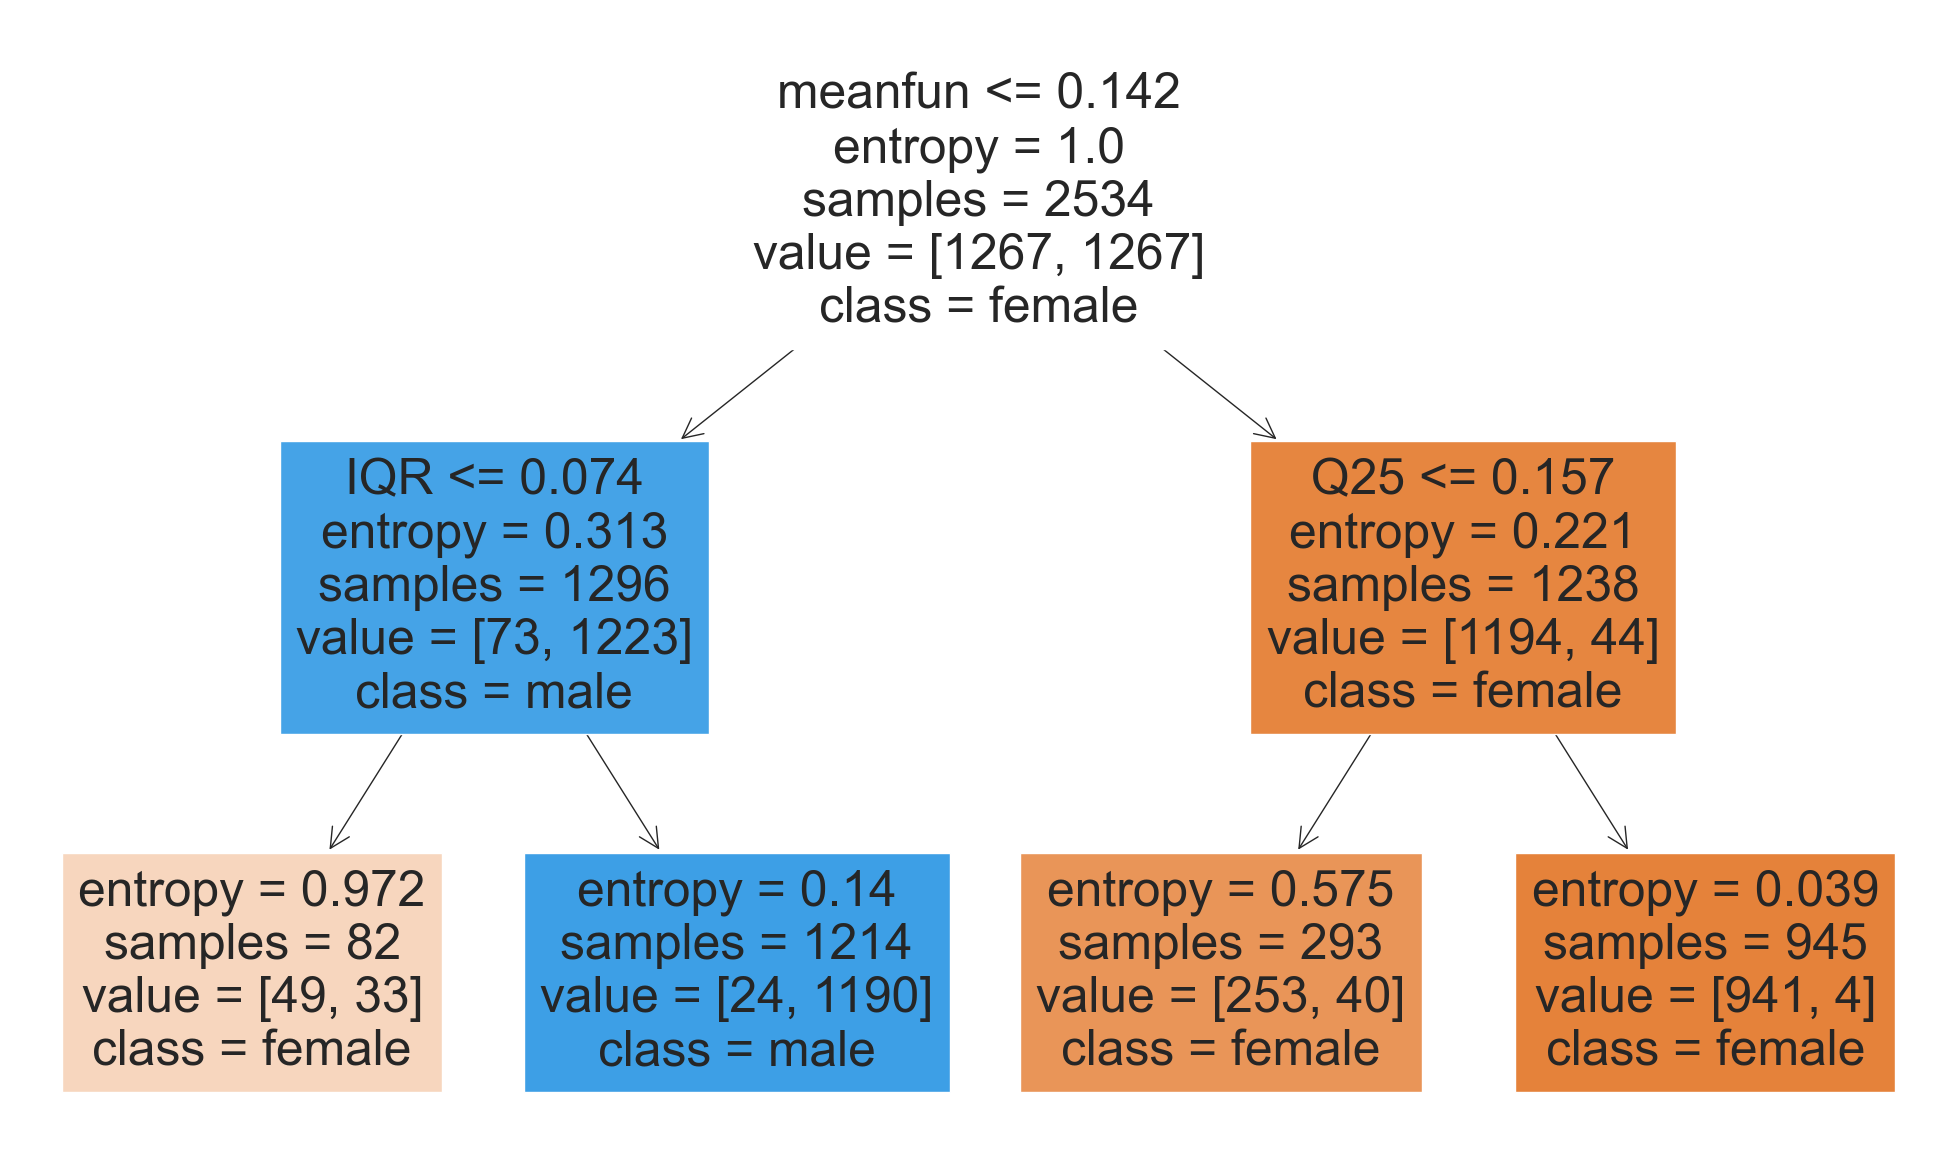

In [110]:
# 7.2
# Инициализируем модель дерева решений с максимальной глубиной 1 и обучаем ее
dt = tree.DecisionTreeClassifier(
    max_depth=2, #глубина
    criterion='entropy', #критерий информативности
    random_state=0 #генератор случайных чисел
)
dt.fit(X_train, y_train)

# Визуализируем дерево решений в виде графа
tree.plot_tree(
    decision_tree=dt, #дерево решений 
    feature_names=X.columns, #имена факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
    class_names=dt.classes_
);

# Делаем предсказания для тестовой и тренировочной выборки
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Проверим метрики 
print(metrics.accuracy_score(y_test, y_test_pred))

In [111]:
# 7.3
# Инициализируем модель дерева решений с максимальной глубиной 1 и обучаем ее
dt = tree.DecisionTreeClassifier(
    # max_depth=2, #глубина
    criterion='entropy', #критерий информативности
    random_state=0 #генератор случайных чисел
)
dt.fit(X_train, y_train)

# Делаем предсказания для тестовой и тренировочной выборки
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Проверим метрики 
print(f'Значение accuray на тестовой выборке : {metrics.accuracy_score(y_test, y_test_pred):.3f}')
print(f'Значение accuray на тренеровочной выборке : {metrics.accuracy_score(y_train, y_train_pred):.3f}')

print(f'Глубина дерева : {dt.get_depth()}')
print(f'Количество листьев в дереве решений :{dt.get_n_leaves()}')

Значение accuray на тестовой выборке : 0.973
Значение accuray на тренеровочной выборке : 1.000
Глубина дерева : 12
Количество листьев в дереве решений :54


In [114]:
# 7.4 
# Задаём сетку параметров
param_grid = {
    'criterion': ['gini', 'entropy'], #критерий информативности
    'max_depth': [4, 5, 6, 7, 8, 9, 10], #максимальная глубина дерева
    'min_samples_split': [3, 4, 5, 10] #минимальное количество объектов, необходимое для сплита
}

# Задаём метод кросс-валидации
cv = model_selection.StratifiedKFold(n_splits=5)

# создадим дерево решений
dt = tree.DecisionTreeClassifier(random_state=0) 

grid = model_selection.GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=cv,
    scoring = 'accuracy'
)
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [3, 4, 5, 10]},
             scoring='accuracy')

In [115]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 3}

In [117]:
# Инициализируем модель дерева решений с максимальной глубиной 1 и обучаем ее
dt = tree.DecisionTreeClassifier(
    max_depth=7, #глубина
    min_samples_split=3,
    criterion='gini', #критерий информативности
    random_state=0 #генератор случайных чисел
)
dt.fit(X_train, y_train)

# Делаем предсказания для тестовой и тренировочной выборки
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Проверим метрики 
print(f'Значение accuray на тестовой выборке : {metrics.accuracy_score(y_test, y_test_pred):.3f}')
print(f'Значение accuray на тренеровочной выборке : {metrics.accuracy_score(y_train, y_train_pred):.3f}')

Значение accuray на тестовой выборке : 0.970
Значение accuray на тренеровочной выборке : 0.996


<Axes: >

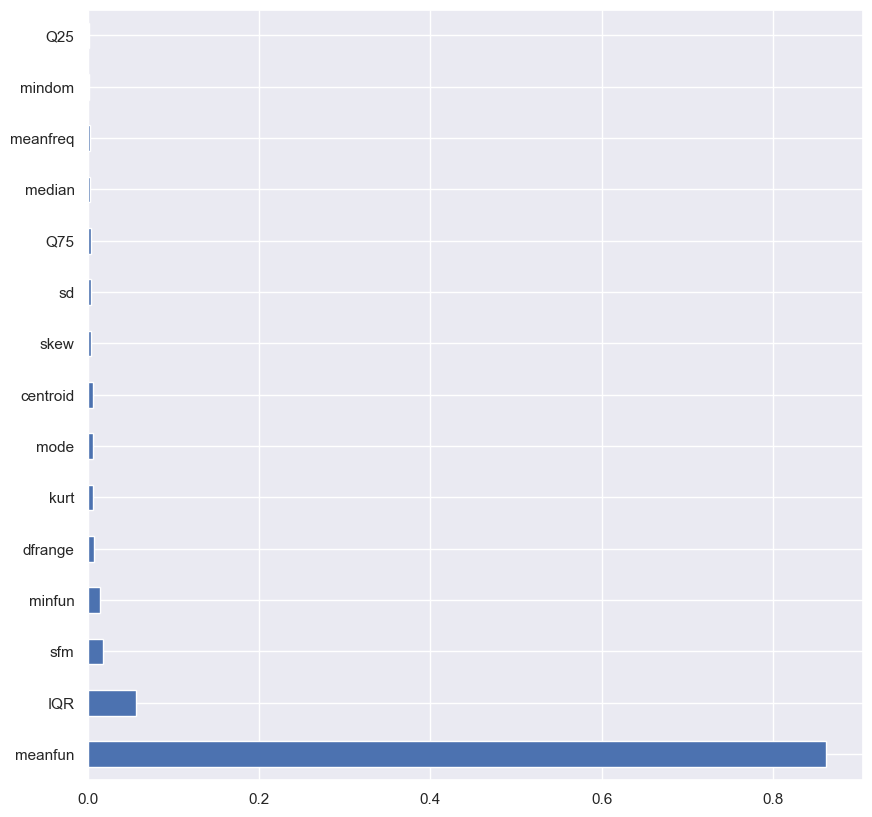

In [118]:
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(dt.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')